<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class5/program05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 깊은 다층 퍼셉트론으로 CIFAR-10 인식하기

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

## 1.데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
# 1차원 구조로 변환
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
# [0, 1]로 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
# 원핫 코드로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## 2.모델 선택

In [3]:
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

## 3.학습 및 예측

In [4]:
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('정확률 =', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50
391/391 - 7s - loss: 1.8214 - accuracy: 0.3480 - val_loss: 1.6961 - val_accuracy: 0.4060 - 7s/epoch - 19ms/step
Epoch 2/50
391/391 - 2s - loss: 1.6167 - accuracy: 0.4265 - val_loss: 1.5633 - val_accuracy: 0.4455 - 2s/epoch - 4ms/step
Epoch 3/50
391/391 - 2s - loss: 1.5366 - accuracy: 0.4541 - val_loss: 1.5567 - val_accuracy: 0.4409 - 2s/epoch - 4ms/step
Epoch 4/50
391/391 - 2s - loss: 1.4739 - accuracy: 0.4766 - val_loss: 1.4725 - val_accuracy: 0.4804 - 2s/epoch - 4ms/step
Epoch 5/50
391/391 - 2s - loss: 1.4245 - accuracy: 0.4932 - val_loss: 1.4617 - val_accuracy: 0.4797 - 2s/epoch - 4ms/step
Epoch 6/50
391/391 - 2s - loss: 1.3744 - accuracy: 0.5150 - val_loss: 1.4041 - val_accuracy: 0.4974 - 2s/epoch - 4ms/step
Epoch 7/50
391/391 - 2s - loss: 1.3386 - accuracy: 0.5255 - val_loss: 1.4265 - val_accuracy: 0.4830 - 2s/epoch - 5ms/step
Epoch 8/50
391/391 - 2s - loss: 1.3069 - accuracy: 0.5372 - val_loss: 1.3578 - val_accuracy: 0.5191 - 2s/epoch - 4ms/step
Epoch 9/50
391/391 - 2s

## 4.성능 시각화
- 정확도

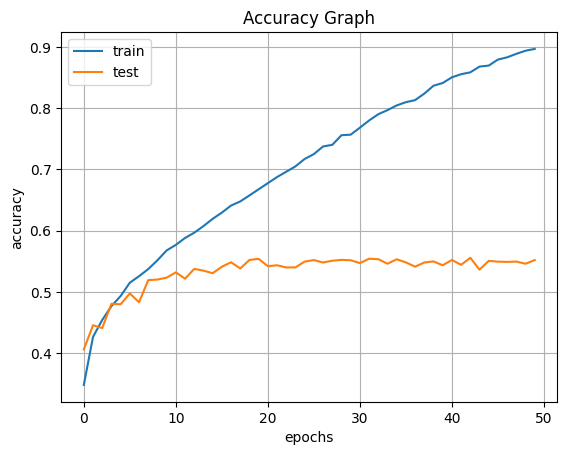

In [5]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

- 손실

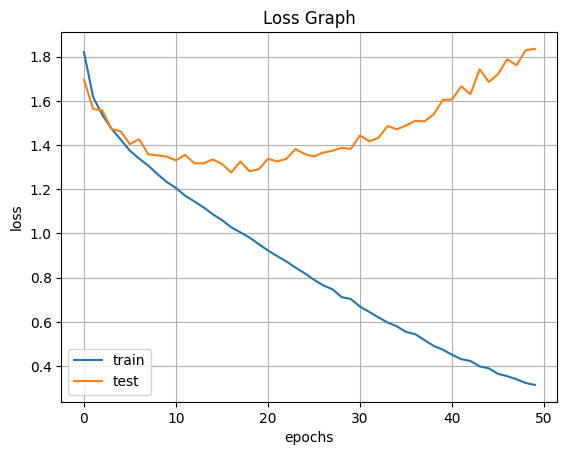

In [6]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()